# Exercise 1

In this activity, you will work with the New York City Airbnb Open Data—a popular, messy, and highly realistic dataset used by data analysts and data scientists around the world. The dataset includes thousands of Airbnb listings along with details about hosts, locations, prices, reviews, and more.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8Pmq3Gv7y7z_2Xun-OqMIk43kd5u0TXEatw&s"/>


To guide your work, you will follow the 6-Step Data Wrangling Process, a professional workflow used in industry:

- Discovering. Become familiar with the data by exploring its structure and observing patterns.

- Structuring. Fix issues related to format, column types, indices, and duplicated records.

- Cleaning. Handle missing values, outliers, and inconsistencies so the dataset becomes trustworthy.

- Enriching. Add new features, aggregate information, and enhance the dataset for deeper insights.

- Validating. Apply rule-based checks to ensure the data meets quality standards.

- Publishing. Export and prepare the cleaned dataset for downstream analysis or reporting.
Throughout this exercise, you will answer questions and fill in code cells based on these six steps. You will mimic what professional data scientists do when preparing data for business intelligence dashboards, machine learning models, or exploratory analysis.

In [120]:
import kagglehub
import os
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'new-york-city-airbnb-open-data' dataset.
Path to dataset files: /kaggle/input/new-york-city-airbnb-open-data
True


## A. Discovering


Display the first 10 rows

In [121]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


Display the column names:

In [122]:
# put your answer here
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


Display the dataframe shape:

In [123]:
# put your answer here
df.shape

(48895, 16)

Identify the numerical features:

In [124]:
# put your answer here
print(df.select_dtypes(include=np.number).columns.tolist())

['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


Identify the categorical features

In [125]:
print(df.select_dtypes(include='object').columns.tolist())

['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


What are the top 5 questions this dataset might help answer?

In [126]:
# put your answer here
# 1. What are the cheapest and more expensive neighborhoods for Airbnb in New York City?
# 2. Does geographic coordinate play a huge factor on an Airbnb's price?
# 3. Which has a greater impact on Airbnb price: the room type or its location?
# 4. How many Airbnb listings are available all year-round and where are they located?
# 5. Which hosts have the most listings, and where are their properties concentrated?

## B. Structuring

Check if the dataset has proper column types

In [127]:
# put your answer here
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


Check if the dataset has index issues

In [128]:
# put your answer here
df.index

RangeIndex(start=0, stop=48895, step=1)

Check if the dataset has duplicated rows

In [129]:
# put your answer here
df.duplicated().sum()

np.int64(0)

Convert columns to correct types (e.g., dates → datetime).

In [130]:
# put your answer here
df['last_review'] = pd.to_datetime(df['last_review'])
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


Identify at least one structural issue and describe how to fix it.

In [131]:
# put your answer here
# the reviews_per_month column often contains null values for listings
# that have 0 number_of_reviews. This is inconsistent because if there are no reviews,
# The fix is to fill these specific null values in reviews_per_month with 0.

## C. Cleaning



Check for missing values

In [132]:
# put your answer here
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Check for outliers in `minimum_nights`

In [133]:
df['minimum_nights'].describe()

,minimum_nights
count,48895.000000
mean,7.029962
std,20.510550
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,1250.000000


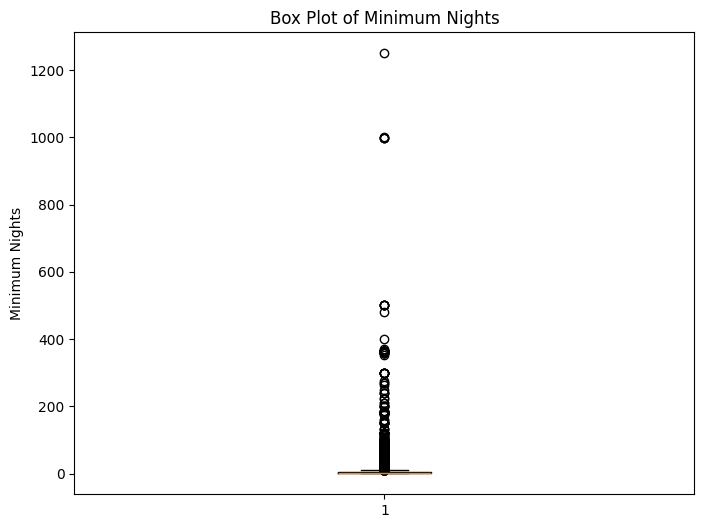

In [134]:
# put your answer here
df['minimum_nights'].describe()


plt.figure(figsize=(8, 6))
plt.boxplot(df['minimum_nights'])
plt.title('Box Plot of Minimum Nights')
plt.ylabel('Minimum Nights')
plt.show()

Check for invalid values (e.g., price ≤ 0)

In [135]:
# put your answer here
df[df['price'] <= 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaT,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


Apply a missing-value strategy (drop, fill, or flag)


In [136]:
# put your answer here
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

Apply an outlier-handling strategy

In [137]:
# put your answer here
df = df[df['minimum_nights'] > 0]

## D. Enriching

Create at least 3 new variables:
- price_per_minimum_night
- review_rate_per_month (combine ratings + frequency)
- is_expensive (boolean flag based on price threshold)


In [138]:
# put your answer here
df['price_per_minimum_night'] = df['price'] / df['minimum_nights']
df['review_rate_per_month'] = df['number_of_reviews'] * df['reviews_per_month']

Create 1 aggregated summary table

(e.g. average price per neighborhood, number of hosts per borough)

In [139]:
# put your answer here
df.groupby('neighbourhood_group')['price'].mean()

,price
neighbourhood_group,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


## E. Validating

Create at least 3 validation checks
- Price must be positive.
- Host ID should not be null.
- Minimum nights must be ≥ 1.
- Generate a validation report:
- Count of rows violating each rule.

Decide if invalid rows (if any) should be removed or corrected?

In [140]:
invalid_prices_count = df[df['price'] <= 0].shape[0]
print(f"Number of rows with invalid prices (price <= 0): {invalid_prices_count}")

Number of rows with invalid prices (price <= 0): 11


In [141]:
host_id_null_count = df['host_id'].isnull().sum()
print(f"Number of rows with null host_id: {host_id_null_count}")

Number of rows with null host_id: 0


In [142]:
invalid_minimum_nights_count = df[df['minimum_nights'] < 1].shape[0]
print(f"Number of rows with invalid minimum_nights (< 1): {invalid_minimum_nights_count}")

Number of rows with invalid minimum_nights (< 1): 0


In [143]:
df = df[df['price'] > 0]
print(f"New DataFrame shape after removing invalid price rows: {df.shape}")

New DataFrame shape after removing invalid price rows: (48884, 18)


## F. Publishing

Select final columns for publication.



In [147]:
price_threshold = 200
df['is_expensive'] = df['price'] > price_threshold
selected_columns = ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'price_per_minimum_night', 'review_rate_per_month', 'is_expensive']
df_cleaned = df[selected_columns]
print("Selected columns for publication:", df_cleaned.columns.tolist())

Selected columns for publication: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'price_per_minimum_night', 'review_rate_per_month', 'is_expensive']


Export cleaned dataset as "cleaned_airbnb.csv"

In [148]:
df_cleaned.to_csv('cleaned_airbnb.csv', index=False)
print("Cleaned dataset exported to 'cleaned_airbnb.csv'")

Cleaned dataset exported to 'cleaned_airbnb.csv'


Export summary reports (e.g., validation or aggregations) as CSV.

In [150]:
average_price_per_neighborhood = df.groupby('neighbourhood_group')['price'].mean()
average_price_per_neighborhood.to_csv('average_price_per_neighborhood.csv')
print("Average price per neighborhood group exported to 'average_price_per_neighborhood.csv'")

Average price per neighborhood group exported to 'average_price_per_neighborhood.csv'
